In [99]:
import pandas as pd
import numpy as np

In [100]:
sms_df= pd.read_csv("datasets/spam.csv",encoding="latin-1")

In [101]:
sms_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Data Cleaning

In [102]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [103]:
sms_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [104]:
sms_df.head(1)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."


In [105]:
sms_df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [106]:
sms_df.isnull().sum()

target    0
text      0
dtype: int64

In [107]:
sms_df.duplicated().sum()

np.int64(403)

In [108]:
sms_df.drop_duplicates(keep='first',inplace=True)

In [109]:
sms_df.shape

(5169, 2)

In [110]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
sms_df['target']=label_encoder.fit_transform(sms_df['target'])

In [111]:
sms_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


EDA

In [112]:
sms_df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

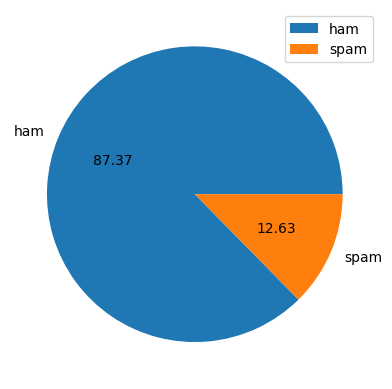

<Figure size 1200x600 with 0 Axes>

In [113]:
import matplotlib.pyplot as plt
plt.pie(sms_df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.legend()
plt.figure(figsize=(12,6))
plt.show()

In [114]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [115]:
sms_df['num_characters']=sms_df['text'].apply(len)

In [116]:
sms_df['num_words']=sms_df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [117]:
sms_df['num_sentence']=sms_df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [118]:
sms_df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [119]:
sms_df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [120]:
#lets check this result seperately for ham and spam
sms_df[sms_df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [121]:
sms_df[sms_df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [122]:
#We can see the clear difference in the mean of number of words, characters and sentence of ham and spam message now lets visualize this more clearly using histogram

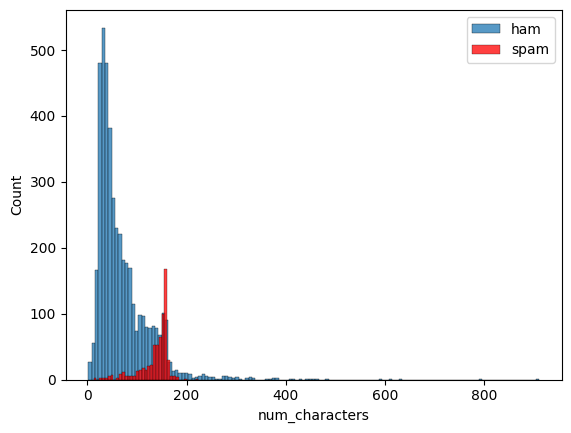

In [123]:
import seaborn as sns
plt.Figure(figsize=(12,8))
sns.histplot(sms_df[sms_df['target']==0]['num_characters'],label='ham')
sns.histplot(sms_df[sms_df['target']==1]['num_characters'],color='red',label='spam')
plt.legend()
plt.show()

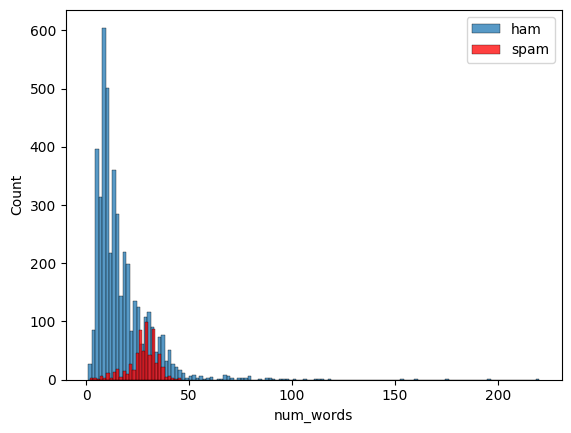

In [124]:
plt.Figure(figsize=(12,8))
sns.histplot(sms_df[sms_df['target']==0]['num_words'],label='ham')
sns.histplot(sms_df[sms_df['target']==1]['num_words'],color='red',label='spam')
plt.legend()
plt.show()

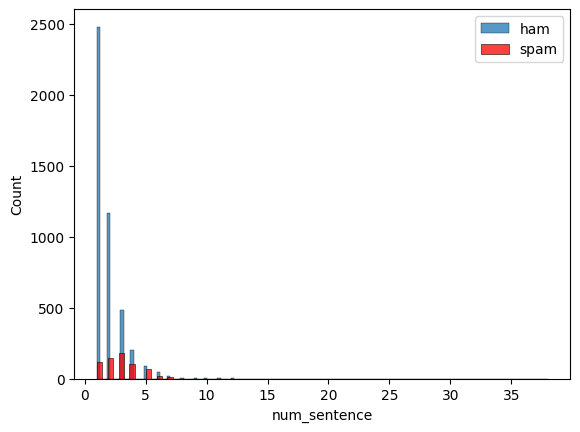

In [125]:
plt.Figure(figsize=(12,8))
sns.histplot(sms_df[sms_df['target']==0]['num_sentence'],label='ham')
sns.histplot(sms_df[sms_df['target']==1]['num_sentence'],color='red',label='spam')
plt.legend()
plt.show()

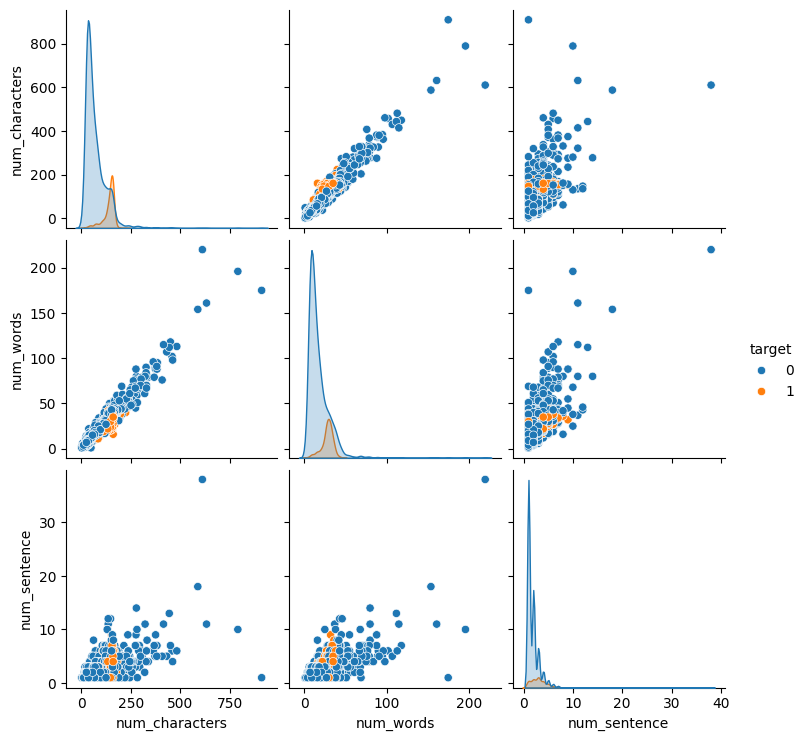

In [126]:
sns.pairplot(sms_df,hue='target')
plt.show()

In [127]:
#We can see there are some outliers

In [128]:
corr_matrix= sms_df.corr(numeric_only=True)
corr_matrix['target'].sort_values(ascending=False)

target            1.000000
num_characters    0.384717
num_sentence      0.263939
num_words         0.262912
Name: target, dtype: float64

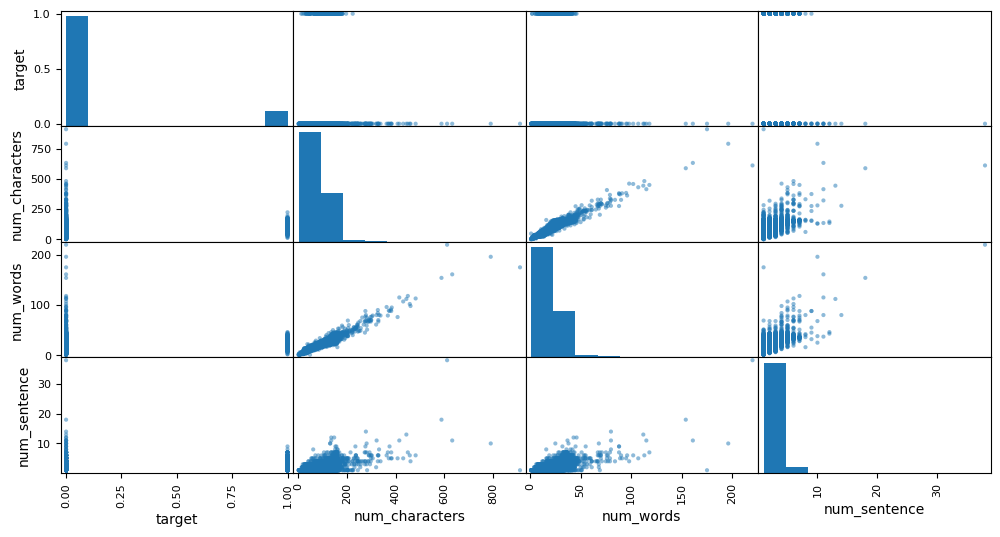

In [129]:
from pandas.plotting import scatter_matrix
attributes=['target','num_characters','num_words','num_sentence']
scatter_matrix(sms_df[attributes],figsize=(12,6))
plt.show()

In [130]:
#here we can see the num_characters,num_words and num_sentence are highly correlated with each other so we only take one of those parameters and drop others .

In [131]:
#lets see heatmap of the parameters with target

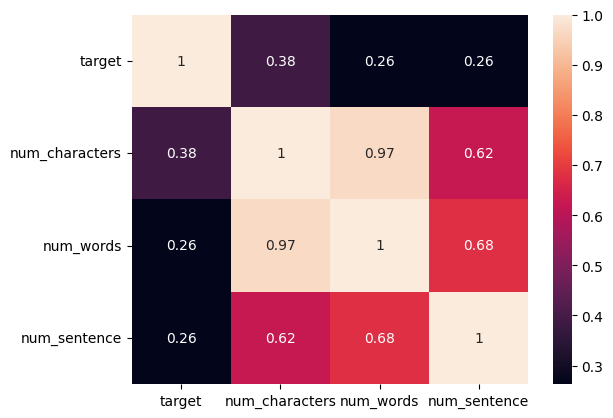

In [132]:
sns.heatmap(sms_df.corr(numeric_only=True),annot=True)
plt.show()

Data Preprocessing

In [133]:
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [134]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
   
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    
    y=[]
    for i in text:
        if i not in stopwords.words('english') and  i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [135]:
sms_df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [136]:
sms_df['transformed_text']=sms_df['text'].apply(transform_text)

In [137]:
sms_df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [138]:
from wordcloud import WordCloud
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')

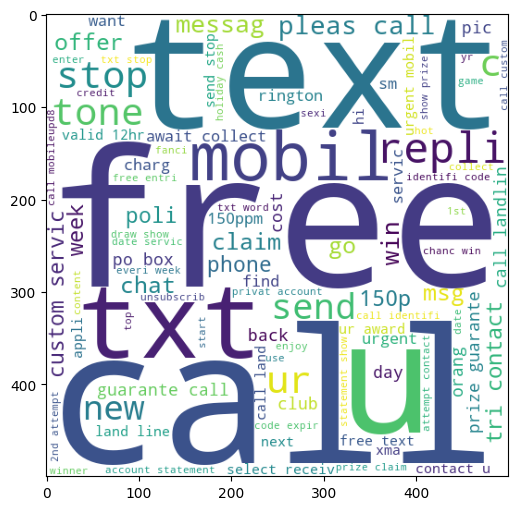

In [139]:
spam_wc=wc.generate(sms_df[sms_df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

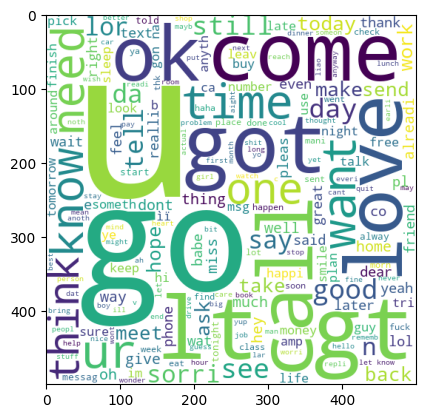

In [140]:
ham_wc=wc.generate(sms_df[sms_df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.Figure(figsize=(12,6))
plt.imshow(ham_wc)
plt.show()

In [141]:
spam_corpus=[]
for msg in sms_df[sms_df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [142]:
from collections import Counter
spam_words=pd.DataFrame(Counter(spam_corpus).most_common(30))

In [143]:
spam_words.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


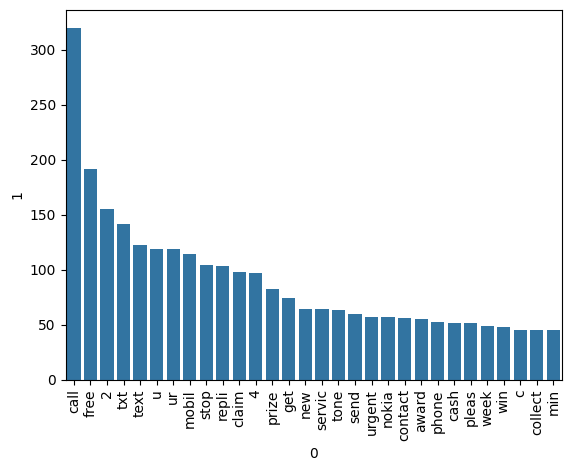

In [144]:
sns.barplot(x=spam_words[0],y=spam_words[1])
plt.xticks(rotation='vertical')
plt.show()

In [145]:
ham_corpus=[]
for msg in sms_df[sms_df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [146]:
ham_words=pd.DataFrame(Counter(ham_corpus).most_common(30))

In [147]:
ham_words.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


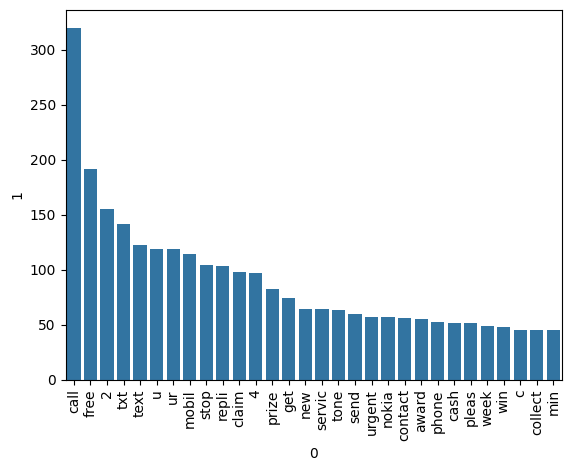

In [148]:
sns.barplot(x=ham_words[0],y=ham_words[1])
plt.xticks(rotation='vertical')
plt.show()

Model Building And Selection Process

In [149]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfid=TfidfVectorizer(max_features=3000)


In [150]:
X=tfid.fit_transform(sms_df['transformed_text']).toarray()
y=sms_df['target'].values

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [152]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
bnb=BernoulliNB()
mnb=MultinomialNB()

In [153]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))


0.8636363636363636
[[771 118]
 [ 23 122]]
0.5083333333333333


In [154]:
bnb.fit(X_train,y_train)
y_pred=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [155]:
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.971953578336557
[[888   1]
 [ 28 117]]
0.9915254237288136


Now when using the Count Vectorizer the precision and accuracy score are low than expected so lets just move to Tfid Vectorizer

And when using Tfid-->mnb we get good results in both precison and accuracy so lets try other models to see if they can beat it

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [157]:
lrc=LogisticRegression(solver='liblinear',penalty='l1')
svc=SVC(kernel='sigmoid',gamma=1.0)
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
rfc=RandomForestClassifier(n_estimators=50,random_state=42)
etc=ExtraTreesClassifier(n_estimators=50,random_state=42)
knc=KNeighborsClassifier()
gbc=GradientBoostingClassifier(n_estimators=50,random_state=42)
abc=AdaBoostClassifier(n_estimators=50,random_state=42)
bgc=BaggingClassifier(n_estimators=5,random_state=42)
xgb = XGBClassifier(n_estimators=50,random_state=42)

In [158]:
clfs={
    'SVC':svc,
    'LR':lrc,
    'MNB':mnb,
    'DTC':dtc,
    'RFC':rfc,
    'ETC':etc,
    'ADA':abc,
    'XGB':xgb,
    'KNC':knc,
    'GBC':gbc,
    'BGC':bgc,
}

In [159]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy, precision



In [160]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    accuracy,precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    print("Name:{}\nAccuracy:{}\nPrecison:{}".format(name,accuracy,precision))
   

Name:SVC
Accuracy:0.97678916827853
Precison:0.9548872180451128
Name:LR
Accuracy:0.9497098646034816
Precison:0.872
Name:MNB
Accuracy:0.971953578336557
Precison:0.9915254237288136


c:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


Name:DTC
Accuracy:0.9342359767891683
Precison:0.8130081300813008
Name:RFC
Accuracy:0.9680851063829787
Precison:0.9827586206896551
Name:ETC
Accuracy:0.9787234042553191
Precison:0.984251968503937
Name:ADA
Accuracy:0.9148936170212766
Precison:0.7938144329896907
Name:XGB
Accuracy:0.9661508704061895
Precison:0.9296875
Name:KNC
Accuracy:0.913926499032882
Precison:1.0
Name:GBC
Accuracy:0.9497098646034816
Precison:0.9514563106796117
Name:BGC
Accuracy:0.9593810444874274
Precison:0.8551724137931035


In [161]:
performance_df=pd.DataFrame({'Algorithms':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [162]:
performance_df.head(8)

,Algorithms,Accuracy,Precision
8,KNC,0.913926,1.000000
2,MNB,0.971954,0.991525
5,ETC,0.978723,0.984252
4,RFC,0.968085,0.982759
0,SVC,0.976789,0.954887
9,GBC,0.949710,0.951456
7,XGB,0.966151,0.929688
1,LR,0.949710,0.872000


In [163]:
new_performance_df=pd.melt(performance_df,id_vars='Algorithms')

In [164]:
new_performance_df

,Algorithms,variable,value
0,KNC,Accuracy,0.913926
1,MNB,Accuracy,0.971954
2,ETC,Accuracy,0.978723
3,RFC,Accuracy,0.968085
4,SVC,Accuracy,0.976789
5,GBC,Accuracy,0.949710
6,XGB,Accuracy,0.966151
7,LR,Accuracy,0.949710
8,BGC,Accuracy,0.959381
9,DTC,Accuracy,0.934236


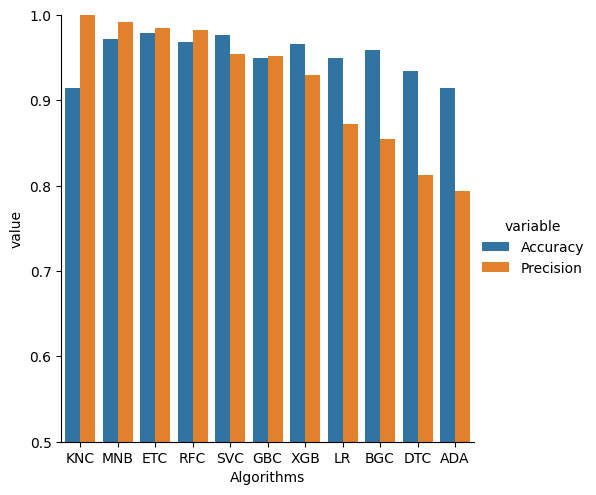

In [165]:
sns.catplot(x='Algorithms',hue='variable',y='value',data=new_performance_df,kind='bar',height=5)
plt.ylim(0.5,1)
plt.Figure(figsize=(12,8))
plt.show()

In [166]:
#Here KNC,MNB,RFC,ETC,GBC shows top results but select MNB due both high accuracy and precision
#But before finalizing lets get the voting classifier of top resulsts and compare it with MNB

In [170]:
knc=KNeighborsClassifier()
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=42)

In [171]:
from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('KNC',knc),('MNB',mnb),('RFC',rfc)],voting='soft')
voting.fit(X_train,y_train)
y_pred_n=voting.predict(X_test)
print("Accuracy:{}\nPrecision:{}".format(accuracy_score(y_test,y_pred_n),precision_score(y_test,y_pred_n)))

Accuracy:0.9661508704061895
Precision:1.0


In [ ]:
#the  precision is top but the accuracy is low lets try Stacking Classifier

In [173]:
from sklearn.ensemble import StackingClassifier
SC=StackingClassifier(estimators=[('KNC',knc),('MNB',mnb),('RFC',rfc)],final_estimator=RandomForestClassifier())
SC.fit(X_train,y_train)
y_pred_n2=SC.predict(X_test)
print("Accuracy:{}\nPrecision:{}".format(accuracy_score(y_test,y_pred_n2),precision_score(y_test,y_pred_n2)))



Accuracy:0.9777562862669246
Precision:0.9420289855072463


In [174]:
#Precision Too low

In [175]:
#Hence We choose MNB as the final model

In [179]:
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))